# Project: Trends on the Film Industry

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The selected dataset for this project is a curated one from Kaggle. This data set contains information
about 10,000 movies collected from The Movie Database (TMDb),
including user ratings and revenue. You can download it from here: https://www.kaggle.com/tmdb/tmdb-movie-metadata.

Some of the questions that I want to explore with this analysis are:

- Which genres are most popular from decade to decade?
- Are revenue and budget associated with movies that have a high rating?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import plotly.express as px
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Structure and characteristics of the dataset

In this section of the report, I will explore the structure of the dataset and check for cleanliness, and then trim and clean the dataset for analysis. 

### General Properties

In [2]:
#The dataset is loaded with Pandas
df = pd.read_csv("tmdb-movies.csv")
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
# Type information for each column and non-null exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
#Let's check how many columns and attributes the data set has
df.shape

(10866, 21)

Some of the insights it is possible to gather from the following table are:

- There are some films with 0 budget and revenue. These values should be missing or not be available.
- The films on this dataset are between 1960 and 2015. 
- The mean popularity of all the film data sets is around 0.64.
- The mean vote average is 5.97. This is the mean score is around 6 points against 10.

In [5]:
# Statistical approach of the data set
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# Let's analyze how many NaN values there are in every attribute
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### Analyzing duplicates

In this step, I will be analyzing if there are duplicated values on the dataset.

In [7]:
# Let's see if there are duplicated values in the dataset
df.duplicated(keep = 'last').value_counts()

False    10865
True         1
dtype: int64

In [8]:
# Removing the duplicated row from the dataset
df.drop_duplicates(inplace = True)

In [9]:
# Checking again the shape of the dataset. One value has been removed.
df.shape

(10865, 21)

### Data Cleaning: Missing Values, Dropping Columns

After discussing the structure of the data and any problems that need to be cleaned, let's perform those cleaning steps in this section.

#### Dropping Columns

In [10]:
# Let's drop the columns that are not going to be needed
df.drop(["imdb_id", "homepage", "keywords", "tagline"], axis = 1, inplace = True)

#### Imputing missing values

In [11]:
# Let's analyze how many NaN values there are in every attribute after dropping columns
df.isna().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

There are some categorical variables still that have missing values. I have decided no to use the mode because it is not representative in this case. For example, it is unlikely that the director that has appeared more times in the dataset was going to film another 44 films in the dataset (number of missing values in the attribute Director). 

I am going to impute the missing values in the five columns in the following way:

- Cast will be filled with 'No cast available'.
- Director will be filled with 'No director available'.
- Overview will be filled with 'No overview available'.
- Genres will be filled with 'No gender available'.
- Production_company will be filled with 'No production company available'.

In [12]:
df['cast'].replace(np.nan, 'No cast available', inplace = True)
df['director'].replace(np.nan, 'No director available', inplace = True)
df['overview'].replace(np.nan, 'No overview available', inplace = True)
df['genres'].replace(np.nan, 'No genres available', inplace = True)
df['production_companies'].replace(np.nan, 'No production company available', inplace = True)

In [13]:
# Let's analyze the NaN values again just to confirm there are no more missing values on the dataset
df.isna().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

#### Cleaning genres, actors and production_companies columns

##### Genres column

A film can have multiple genres. Films often have genres that overlap, such as adventure in a spy film, or crime in a science fiction film. But one genre is predominant. For this reason, only the first genre will be kept.

In [14]:
df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [15]:
# Let's split using the symbol | and create a new dataframe with all the genres separatelly, keeping just the first column
df_genres = df['genres'].str.split("|", expand = True)
df_genres.drop([1,2,3,4], axis = 1, inplace = True)
df_genres.head(3)

,0
0,Action
1,Action
2,Adventure


In [16]:
# Let's concatenate both dataframes, change the name of column 0 and drop the column 'genres'
dft = pd.concat([df.reset_index(drop=True), df_genres.reset_index(drop=True)], axis=1)
dft.rename(columns={0: 'main_genre'}, inplace = True)
dft.drop('genres', axis = 1, inplace = True)

In [17]:
dft.head(3)

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,main_genre
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure


Let's see how many different main genres we have now listed on the dataset: 

In [18]:
dft['main_genre'].value_counts()

Drama                  2453
Comedy                 2319
Action                 1590
Horror                  915
Adventure               586
Thriller                491
Documentary             432
Animation               403
Crime                   380
Fantasy                 272
Science Fiction         214
Romance                 186
Family                  144
Mystery                 125
Music                   100
TV Movie                 78
War                      59
History                  44
Western                  42
No genres available      23
Foreign                   9
Name: main_genre, dtype: int64

##### Cast & production companies columns

Let's replace the symbol | that appears on both columns on this step.

In [19]:
dft['cast'] = dft['cast'].str.replace('|', ", ")
dft['production_companies'] = dft['production_companies'].str.replace('|', ", ")

In [20]:
dft

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,main_genre
0,135397,32.985763,150000000,1513528810,Jurassic World,"Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,"Universal Studios, Amblin Entertainment, Legen...",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,"Tom Hardy, Charlize Theron, Hugh Keays-Byrne, ...",George Miller,An apocalyptic story set in the furthest reach...,120,"Village Roadshow Pictures, Kennedy Miller Prod...",5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
2,262500,13.112507,110000000,295238201,Insurgent,"Shailene Woodley, Theo James, Kate Winslet, An...",Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,"Summit Entertainment, Mandeville Films, Red Wa...",3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,"Lucasfilm, Truenorth Productions, Bad Robot",12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action
4,168259,9.335014,190000000,1506249360,Furious 7,"Vin Diesel, Paul Walker, Jason Statham, Michel...",James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,"Universal Pictures, Original Film, Media Right...",4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,21,0.080598,0,0,The Endless Summer,"Michael Hynson, Robert August, Lord 'Tally Ho'...",Bruce Brown,"The Endless Summer, by Bruce Brown, is one of ...",95,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00,Documentary
10861,20379,0.065543,0,0,Grand Prix,"James Garner, Eva Marie Saint, Yves Montand, T...",John Frankenheimer,Grand Prix driver Pete Aron is fired by his te...,176,"Cherokee Productions, Joel Productions, Dougla...",12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00,Action
10862,39768,0.065141,0,0,Beregis Avtomobilya,"Innokentiy Smoktunovskiy, Oleg Efremov, Georgi...",Eldar Ryazanov,An insurance agent who moonlights as a carthie...,94,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00,Mystery
10863,21449,0.064317,0,0,"What's Up, Tiger Lily?","Tatsuya Mihashi, Akiko Wakabayashi, Mie Hama, ...",Woody Allen,"In comic Woody Allen's film debut, he took the...",80,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00,Action


<a id='eda'></a>
## Exploratory Data Analysis

Let's move on to exploratory data analysis in this section. First, I will look carefully at the variables involved in each question, and then I will analyze the relationship between them.

### What Genres Have Been More Popular over the Decades?

First of all, let's see which genres are the most popular:

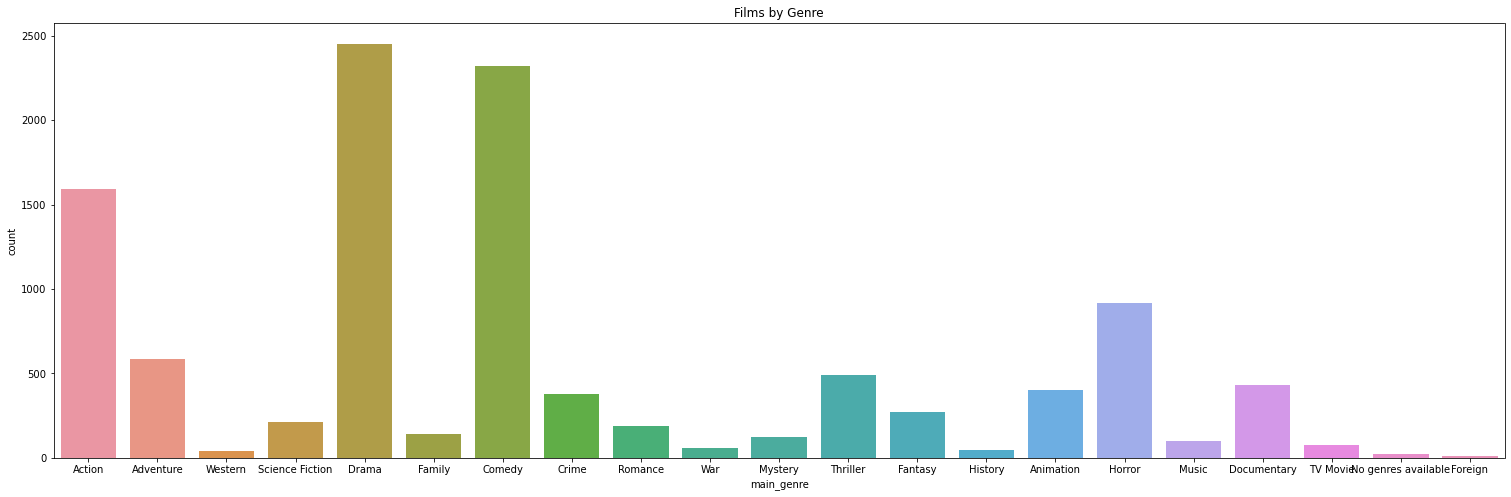

In [56]:
fig = plt.subplots(figsize=(26,8))
sns.countplot(data = dft, x = "main_genre").set_title("Films by Genre")
plt.show()

As we can see, five genders have more films: Drama, Comedy, Action, Honor, and Adventure. 

Let's see what happens over the years. As you can see in the following graphic, every year more and more films are released. This growth starts at the very beginning of 1980 and continues until 2015. 

Why is this happening? It would be necessary more information to get conclusions, but the technology makes it easier than every record your films with a low budget.

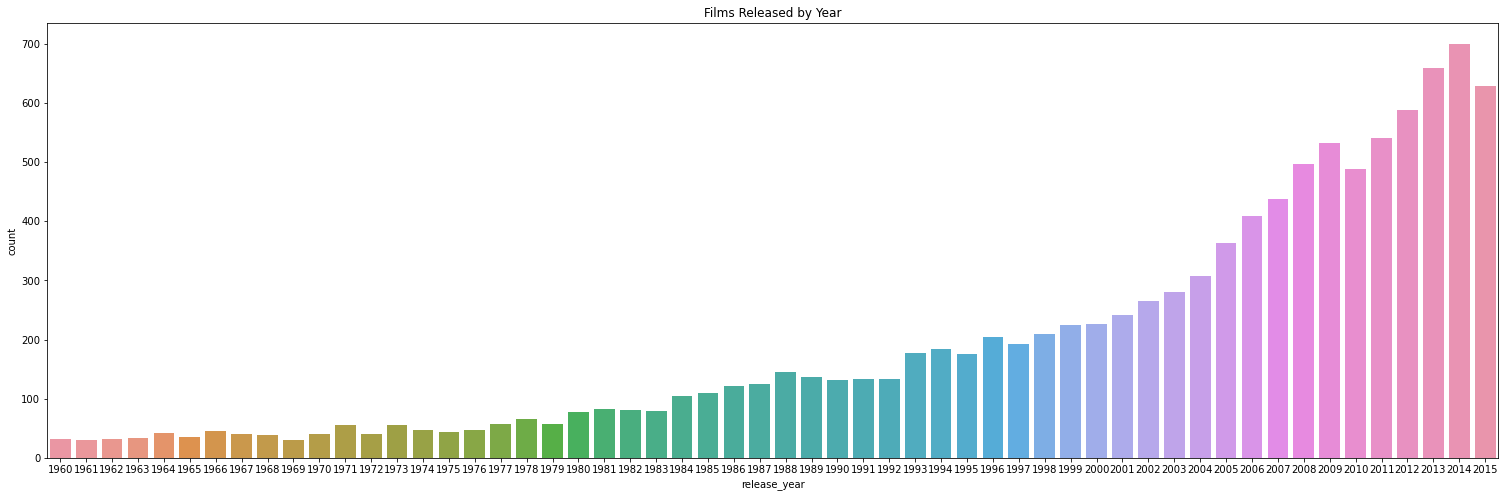

In [54]:
fig = plt.subplots(figsize=(26,8))
sns.countplot(data = dft, x = "release_year").set_title("Films Released by Year")
plt.show()

In [23]:
#Let's create a dataframe grouped by release_year and main_genre
dft_g = dft.groupby(['release_year', 'main_genre']).count()
dft_g.reset_index(inplace = True)
dft_g

,release_year,main_genre,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj
0,1960,Action,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
1,1960,Adventure,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2,1960,Comedy,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
3,1960,Crime,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1960,Drama,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,2015,Science Fiction,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
840,2015,TV Movie,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
841,2015,Thriller,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72
842,2015,War,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [48]:
#Creating a graphic when it is possible to see the evolution of every genre over the years
fig = px.line(dft_g, x="release_year", y="id", color='main_genre', title = "Evolution of Genre by Year")
fig.show()

On the last graph, we can see some trends about the genre over decades:
    
- Drama is the main genre that has been growing more every decade. It is the most used genre in films.
- The number of films categorized as Comedy has been decreasing since 2010.
- Thriller is a genre that has been growing faster since 2010.
- Horror is another of the genres that have been rising since 1998.

### Are revenue and budget associated with movies that have a high rating?

With this question, I want to explore if there is a relationship between these two variables against rating. Does a high revenue or budget imply a high rating or vice-versa? Or is not there any correlation? 

First of all, let's see how these variables behave separately with a histogram. A filter will be applied to select only the rows with revenue different to 0 as it is possible to understand there is no data available for those films or they weren't released on cinemas.

In [25]:
dft_nz = dft[(dft['revenue_adj'] != 0)]

Text(0.5, 1.0, 'Distribution of revenue')

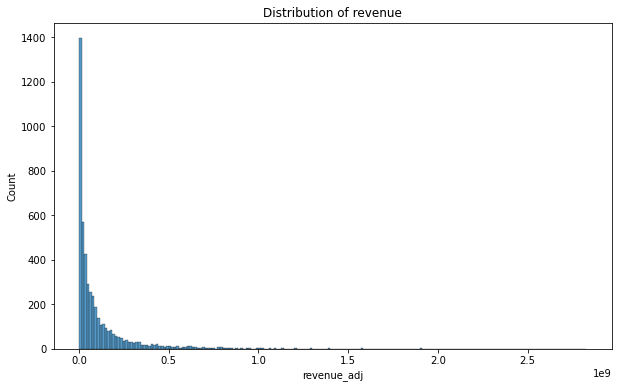

In [47]:
# Let's see the distribution of revenue_adj
fig = plt.subplots(figsize=(10,6))
sns.histplot(data=dft_nz, x="revenue_adj").set_title("Distribution of revenue")

Text(0.5, 1.0, 'Distribution of rating')

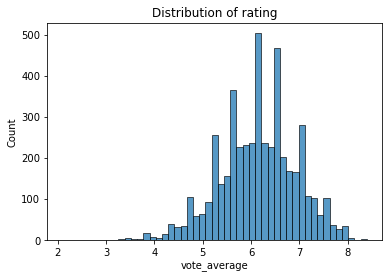

In [36]:
#Let's see the distribution of vote_average
sns.histplot(data=dft_nz, x="vote_average").set_title("Distribution of rating")

We can see that most of the films have a rating of around 5.8 and 6.5. Also, most of the films have had revenue around 0.0 and 0.5 million dollars. 

Now, let's create a scatter plot to see the behaviour between these two attributes: 

C:\Users\xsof\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0.98, 'Correlation between rating and revenue')

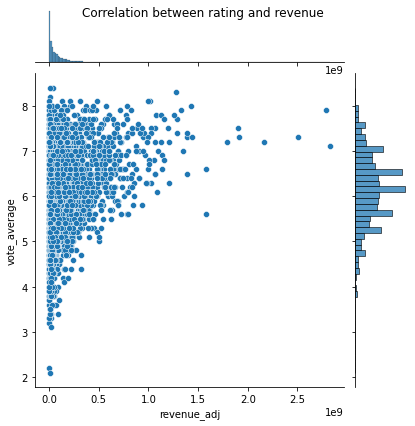

In [45]:
sns.jointplot(dft_nz["revenue_adj"],dft_nz["vote_average"])
plt.suptitle("Correlation between rating and revenue")

It is not possible to see any pattern on the scatter plot graphed. This means that there is no relationship between the variables. Let's confirm our hypotheses with a correlation graphic between both variables:

Text(0.5, 1.0, 'Correlation between rating and revenue')

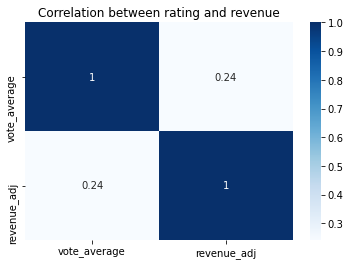

In [29]:
sns.heatmap(dft_nz[["vote_average","revenue_adj"]].corr(), annot=True, cmap="Blues").set_title("Correlation between rating and revenue")

As we can see, the correlation between these two variables is low as it is near to 0. It can be assumed that there is no relationship between attributes in this case.

Does this relationship of no correlation happen with budget_adj? Let's see it:

Text(0.5, 1.0, 'Distribution of budget_adj')

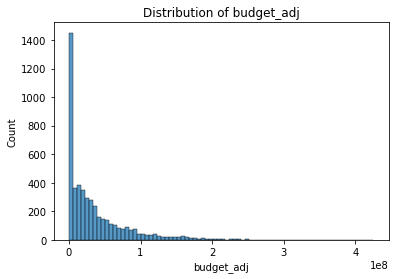

In [33]:
#Let's see the distribution of budget_adj
sns.histplot(data=dft_nz, x="budget_adj").set_title("Distribution of budget_adj")

We can see that there are lots of films that have assigned 0 as budget. Also, we can see there is no patterns on the scatter plot: 

C:\Users\xsof\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0.98, 'Correlation between rating and budget')

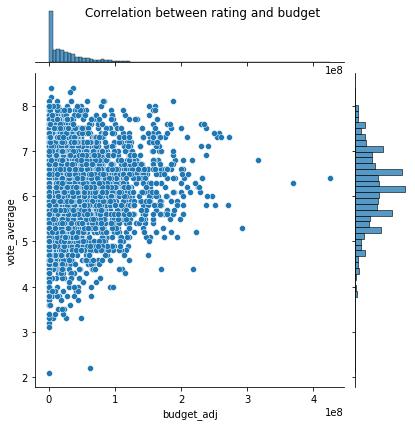

In [44]:
sns.jointplot(dft_nz["budget_adj"],dft_nz["vote_average"])
plt.suptitle("Correlation between rating and budget")

And, again, it is possible to confirm that there is no correlation between rating and budget, as we see in the graph below:

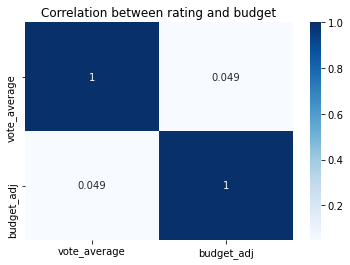

In [32]:
sns.heatmap(dft_nz[["vote_average","budget_adj"]].corr(), annot=True, cmap="Blues").set_title("Correlation between rating and budget")
plt.show()

<a id='conclusions'></a>
## Conclusions

Let's summarize the findings and the results of the analysis.

### Limitations of the dataset

This dataset contains only 10.000 films from over the world. I consider this sample is quite small due to the number of films that are released every year. For this reason, I think it would be necessary for a bigger sample of data to extract to be sufficient to answer the questions brought up before.

### Missing values & imputation

First of all, I want to conclude that there was some categorical information missing. I impute them as 'No information available for this dataset. The same happens with revenue_adj. Does zero revenue imply that these films weren't released in the cinema or they didn't sell any copy of the film? I just supposed there weren't data available for those films.

### Genre over years

I conclude that five genders have been more popular, independently of the decade it was filmed. The list is composed of Drama, Comedy, Action, Honor, and Adventure. 

Also, it is possible to conclude that every year more and more films are released. This growth starts at the very beginning of 1980 and continues, at least, until 2015.

After analyzing the evolution of the genres over time, the following conclusions are extracted:

- Drama is the main genre that has been growing more every decade.
- The number of films categorized as Comedy has been decreasing since 2010.
- Thriller is a genre that has been growing faster since 2010.
- Horror is another of the genres that have been rising since 1998.

### Revenue/Budget vs. Rating

Studying separately both variables, we can see that most of the films have a rating of around 5.8 and 6.5. Also, most of the films have had revenue around 0.0 and 0.5 million dollars.

Regarding the correlation between revenue and rating, it is confirmed that there is no relationship between those variables as their correlation is around 0.24. There wasn't a specific pattern on the scatter plot as we saw on the graph. 

Something similar happens with the budget. As it is possible to see in the graph, the correlation between these two variables is around 0.05, which is very close to 0.

That's why I can conclude budget and revenue don't have any impact on the rating of the film. 

## Bibliography

- Plotly documentation was consulted to create the line chart: https://plotly.com/python/line-charts/
- Seaborn documetantion was consulted to create the correlation chart: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
- StackOverflow was consulted to add titles to a jointplot: https://stackoverflow.com/questions/60358228/how-to-set-title-on-seaborn-jointplot